## Importing necessary modules

In [1]:
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

### Reading training log file

In [2]:
with open("training-log.txt",'r') as file:
    log=file.readlines()
    log=[re.sub('\n','',i) for i in log]

In [3]:
log

['[2020-03-14 06:50:38,443 INFO] Step 50/70000; acc:   3.35; ppl: 23606.72; xent: 10.07; lr: 0.15000; 25478/4934 tok/s;     27 sec',
 '[2020-03-14 06:50:52,078 INFO] Step 100/70000; acc:   3.45; ppl: 7637.42; xent: 8.94; lr: 0.15000; 51633/9810 tok/s;     41 sec',
 '[2020-03-14 06:51:06,390 INFO] Step 150/70000; acc:   3.47; ppl: 5121.58; xent: 8.54; lr: 0.15000; 49188/9873 tok/s;     55 sec',
 '[2020-03-14 06:51:20,614 INFO] Step 200/70000; acc:   3.80; ppl: 4147.84; xent: 8.33; lr: 0.15000; 49494/9917 tok/s;     70 sec',
 '[2020-03-14 06:51:34,899 INFO] Step 250/70000; acc:   4.17; ppl: 3592.37; xent: 8.19; lr: 0.15000; 49286/9902 tok/s;     84 sec',
 '[2020-03-14 06:51:49,014 INFO] Step 300/70000; acc:   4.15; ppl: 3379.74; xent: 8.13; lr: 0.15000; 49876/9860 tok/s;     98 sec',
 '[2020-03-14 06:52:03,225 INFO] Step 350/70000; acc:   4.23; ppl: 3154.74; xent: 8.06; lr: 0.15000; 49538/9894 tok/s;    112 sec',
 '[2020-03-14 06:52:18,196 INFO] Step 400/70000; acc:   4.10; ppl: 2845.73;

## Validation Accuracy & Perplexity Plot

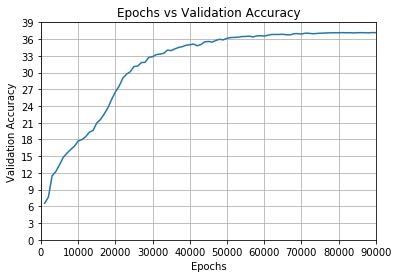

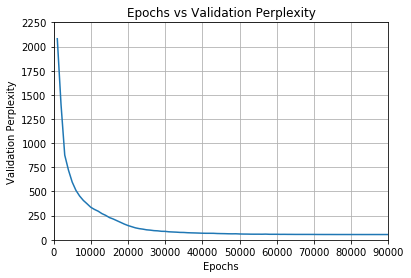

In [4]:
# Validation accuracy graph
val_acc=[]
for line in log:
    if "Validation accuracy" in line:
        val_acc.append(float(line.split()[-1]))
val_epochs=list(range(1000,90001,1000))
plt.plot(val_epochs,val_acc)
plt.xlim(0,90000)
plt.ylim(0,38)
plt.yticks(np.arange(0,40,3))
plt.title("Epochs vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.grid()
plt.savefig("val-acc.png")
plt.show()

#####################################################

# Validation accuracy graph
val_ppl=[]
for line in log:
    if "Validation perplexity" in line:
        val_ppl.append(float(line.split()[-1]))
val_epochs=list(range(1000,90001,1000))
plt.plot(val_epochs,val_ppl)
plt.xlim(0,90000)
plt.ylim(0,2250)
#plt.yticks(np.arange(0,41,2))
plt.title("Epochs vs Validation Perplexity")
plt.xlabel("Epochs")
plt.ylabel("Validation Perplexity")
plt.grid()
plt.savefig("val-ppl.png")
plt.show()


## Training Accuracy, Perplexity, Loss, Learning Rate Plot

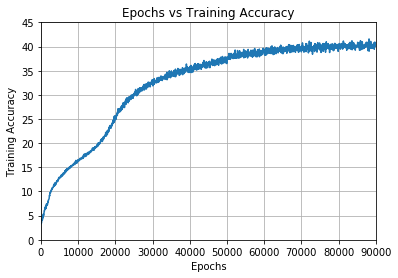

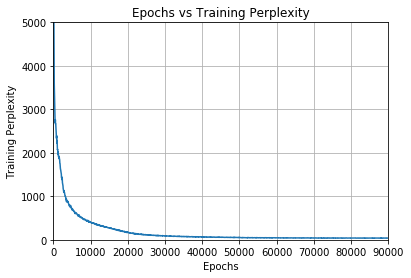

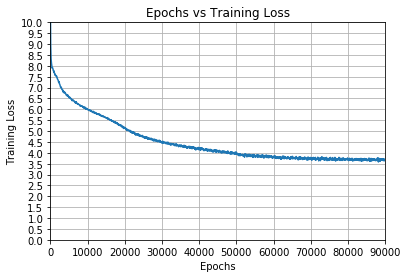

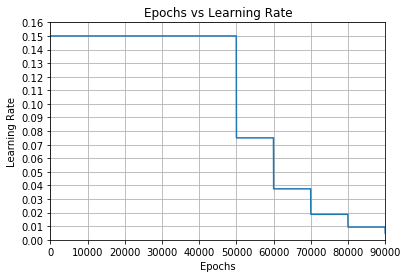

In [9]:
train_acc=[]
train_ppl=[]
train_loss=[]
train_lr=[]
epochs=list(range(50,90001,50))
for line in log:
    if 'xent:' in line:
        train_acc.append(float(line.split()[6][0:-1]))
        train_ppl.append(float(line.split()[8][0:-1]))
        train_loss.append(float(line.split()[10][0:-1]))
        train_lr.append(float(line.split()[12][0:-1]))

#######################################################        
plt.plot(epochs,train_acc)
plt.xlim(0,90000)
plt.ylim(0,45)
#plt.yticks(np.arange(0,41,2))
plt.title("Epochs vs Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.grid()
plt.savefig("train-acc.png")
plt.show()

#######################################################
plt.plot(epochs,train_ppl)
plt.xlim(0,90000)
plt.ylim(0,5000)
#plt.yticks(np.arange(0,41,2))
plt.title("Epochs vs Training Perplexity")
plt.xlabel("Epochs")
plt.ylabel("Training Perplexity")
plt.grid()
plt.savefig("train-ppl.png")
plt.show()

#######################################################
plt.plot(epochs,train_loss)
plt.xlim(0,90000)
plt.ylim(0,10)
plt.yticks(np.arange(0,10.5,0.5))
plt.title("Epochs vs Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.grid()
plt.savefig("train-loss.png")
plt.show()


#######################################################
plt.plot(epochs,train_lr)
plt.xlim(0,90000)
plt.ylim(0,0.16)
plt.yticks(np.arange(0,0.17,0.01))
plt.title("Epochs vs Learning Rate")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.grid()
plt.savefig("train-lr.png")
plt.show()